<a href="https://colab.research.google.com/github/edlovesdata/Datathon25_Chevron/blob/main/Ed_final__Rice25_Chevron_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
# importing data
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/My Drive/Chevron data/training.csv'
file_path_scoring = '/content/drive/My Drive/Chevron data/scoring.csv'

Mounted at /content/drive


In [ ]:
training_df = pd.read_csv(file_path)
scoring_df = pd.read_csv(file_path_scoring)

In [ ]:
training_df.shape

(41053, 10)

In [ ]:
# start cleaning data
missing_values = training_df.isnull().sum()

In [ ]:
print ('Missing values in each column:')
print(missing_values)

Missing values in each column:
Date                                                   0
Vehicle Category                                       0
GVWR Class                                             0
Fuel Type                                              0
Model Year                                           603
Fuel Technology                                        0
Electric Mile Range                                    0
Number of Vehicles Registered at the Same Address      0
Region                                                 0
Vehicle Population                                     0
dtype: int64


In [ ]:
training_df.dropna(inplace = True)

In [ ]:
missing_values = training_df.isnull().sum()

In [ ]:
print('Missing values in each column after cleaning:')
print(missing_values)

Missing values in each column after cleaning:
Date                                                 0
Vehicle Category                                     0
GVWR Class                                           0
Fuel Type                                            0
Model Year                                           0
Fuel Technology                                      0
Electric Mile Range                                  0
Number of Vehicles Registered at the Same Address    0
Region                                               0
Vehicle Population                                   0
dtype: int64


In [ ]:
# checking for duplicates
duplicate_rows = training_df[training_df.duplicated()]

In [ ]:
print (f'Number of duplicate rows: {len(duplicate_rows)}')

Number of duplicate rows: 0


In [ ]:
categorical_columns = training_df.select_dtypes(include=['object', 'category']).columns

In [ ]:
possible_categorical_values = {}
for column in categorical_columns:
    unique_values = training_df[column].unique()
    possible_categorical_values[column] = unique_values

In [ ]:
print(possible_categorical_values)

{'Vehicle Category': array(['P', 'T2', 'T3', 'T1', 'MC', 'T4', 'T7', 'T6', 'T5', 'MH', 'BS',
       'B', 'BT'], dtype=object), 'GVWR Class': array(['Not Applicable', '1', '2', 'Unknown', '8', '3', '5', '6', '7',
       '4'], dtype=object), 'Fuel Type': array(['Gasoline', 'Electric', 'Diesel', 'Natural Gas', 'Hydrogen',
       'Unknown'], dtype=object), 'Fuel Technology': array(['ICE', 'BEV', 'PHEV', 'FCEV'], dtype=object), 'Electric Mile Range': array(['Not Applicable', '>150 miles', '0 to 50 miles', '51 to 100 miles',
       '101 to 150 miles', 'Unknown'], dtype=object), 'Number of Vehicles Registered at the Same Address': array(['≥4', '1', '2', '3', 'Unknown'], dtype=object), 'Region': array(['Statewide'], dtype=object)}


In [ ]:
# transforming column and removing unwanted data types
vehicle_registered_numeric_values = pd.to_numeric(training_df['Number of Vehicles Registered at the Same Address'], errors='coerce')
vehicle_registered_median_value = (round(vehicle_registered_numeric_values.dropna().median(),4))


training_df['Number of Vehicles Registered at the Same Address'] = training_df['Number of Vehicles Registered at the Same Address'].replace({'≥4': 4,'Unknown': vehicle_registered_median_value})
training_df['Number of Vehicles Registered at the Same Address'] = training_df['Number of Vehicles Registered at the Same Address'].astype(int)

scoring_df['Number of Vehicles Registered at the Same Address'] = scoring_df['Number of Vehicles Registered at the Same Address'].replace({'≥4': 4, 'Unknown': vehicle_registered_median_value})
scoring_df['Number of Vehicles Registered at the Same Address'] = scoring_df['Number of Vehicles Registered at the Same Address'].astype(int)

In [ ]:
# tranform categorical values to numerical values
label_encoders = {}
categorical_columns = ['Vehicle Category', 'Fuel Type', 'Fuel Technology', 'Region']
for col in categorical_columns:
    le = LabelEncoder()
    training_df[col] = le.fit_transform(training_df[col])
    scoring_df[col] = le.transform(scoring_df[col])
    label_encoders[col] = le

In [ ]:
# convert Electric Mile Range to ordinal values
range_mapping = {'0 to 50 miles': 1, '51 to 100 miles': 2, '101 to 150 miles': 3, '>150 miles': 4, 'Not Applicable': 0, 'Unknown': 0}

In [ ]:
training_df['Electric Mile Range'] = training_df['Electric Mile Range'].replace(range_mapping).astype(int)
scoring_df['Electric Mile Range'] = scoring_df['Electric Mile Range'].replace(range_mapping).astype(int)

<ipython-input-1200-d50294e8ad35>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_df['Electric Mile Range'] = training_df['Electric Mile Range'].replace(range_mapping).astype(int)
<ipython-input-1200-d50294e8ad35>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  scoring_df['Electric Mile Range'] = scoring_df['Electric Mile Range'].replace(range_mapping).astype(int)


In [ ]:
# converting GVWR Class values to numerical or fill in NaN values by 0.
training_df['GVWR Class'] = pd.to_numeric(training_df['GVWR Class'], errors='coerce').fillna(0)
scoring_df['GVWR Class'] = pd.to_numeric(scoring_df['GVWR Class'], errors='coerce').fillna(0)

In [ ]:
print ('Data after encoding:')
print(training_df.head(10))

Data after encoding:
   Date  Vehicle Category  GVWR Class  Fuel Type  Model Year  Fuel Technology  \
0  2019                 5         0.0          2      2020.0                2   
1  2020                 5         0.0          2      2020.0                2   
2  2021                 5         0.0          2      2020.0                2   
3  2019                 5         0.0          2      2019.0                2   
4  2019                 5         0.0          2      2018.0                2   
5  2021                 5         0.0          2      2021.0                2   
6  2022                 5         0.0          2      2021.0                2   
7  2021                 5         0.0          2      2021.0                2   
8  2020                 5         0.0          2      2021.0                2   
9  2020                 5         0.0          2      2020.0                2   

   Electric Mile Range  Number of Vehicles Registered at the Same Address  \
0         

In [ ]:
print ('updated data types')
print(training_df.dtypes)

updated data types
Date                                                   int64
Vehicle Category                                       int64
GVWR Class                                           float64
Fuel Type                                              int64
Model Year                                           float64
Fuel Technology                                        int64
Electric Mile Range                                    int64
Number of Vehicles Registered at the Same Address      int64
Region                                                 int64
Vehicle Population                                     int64
dtype: object


In [ ]:
# check correlation
correlation_matrix = training_df.corr()

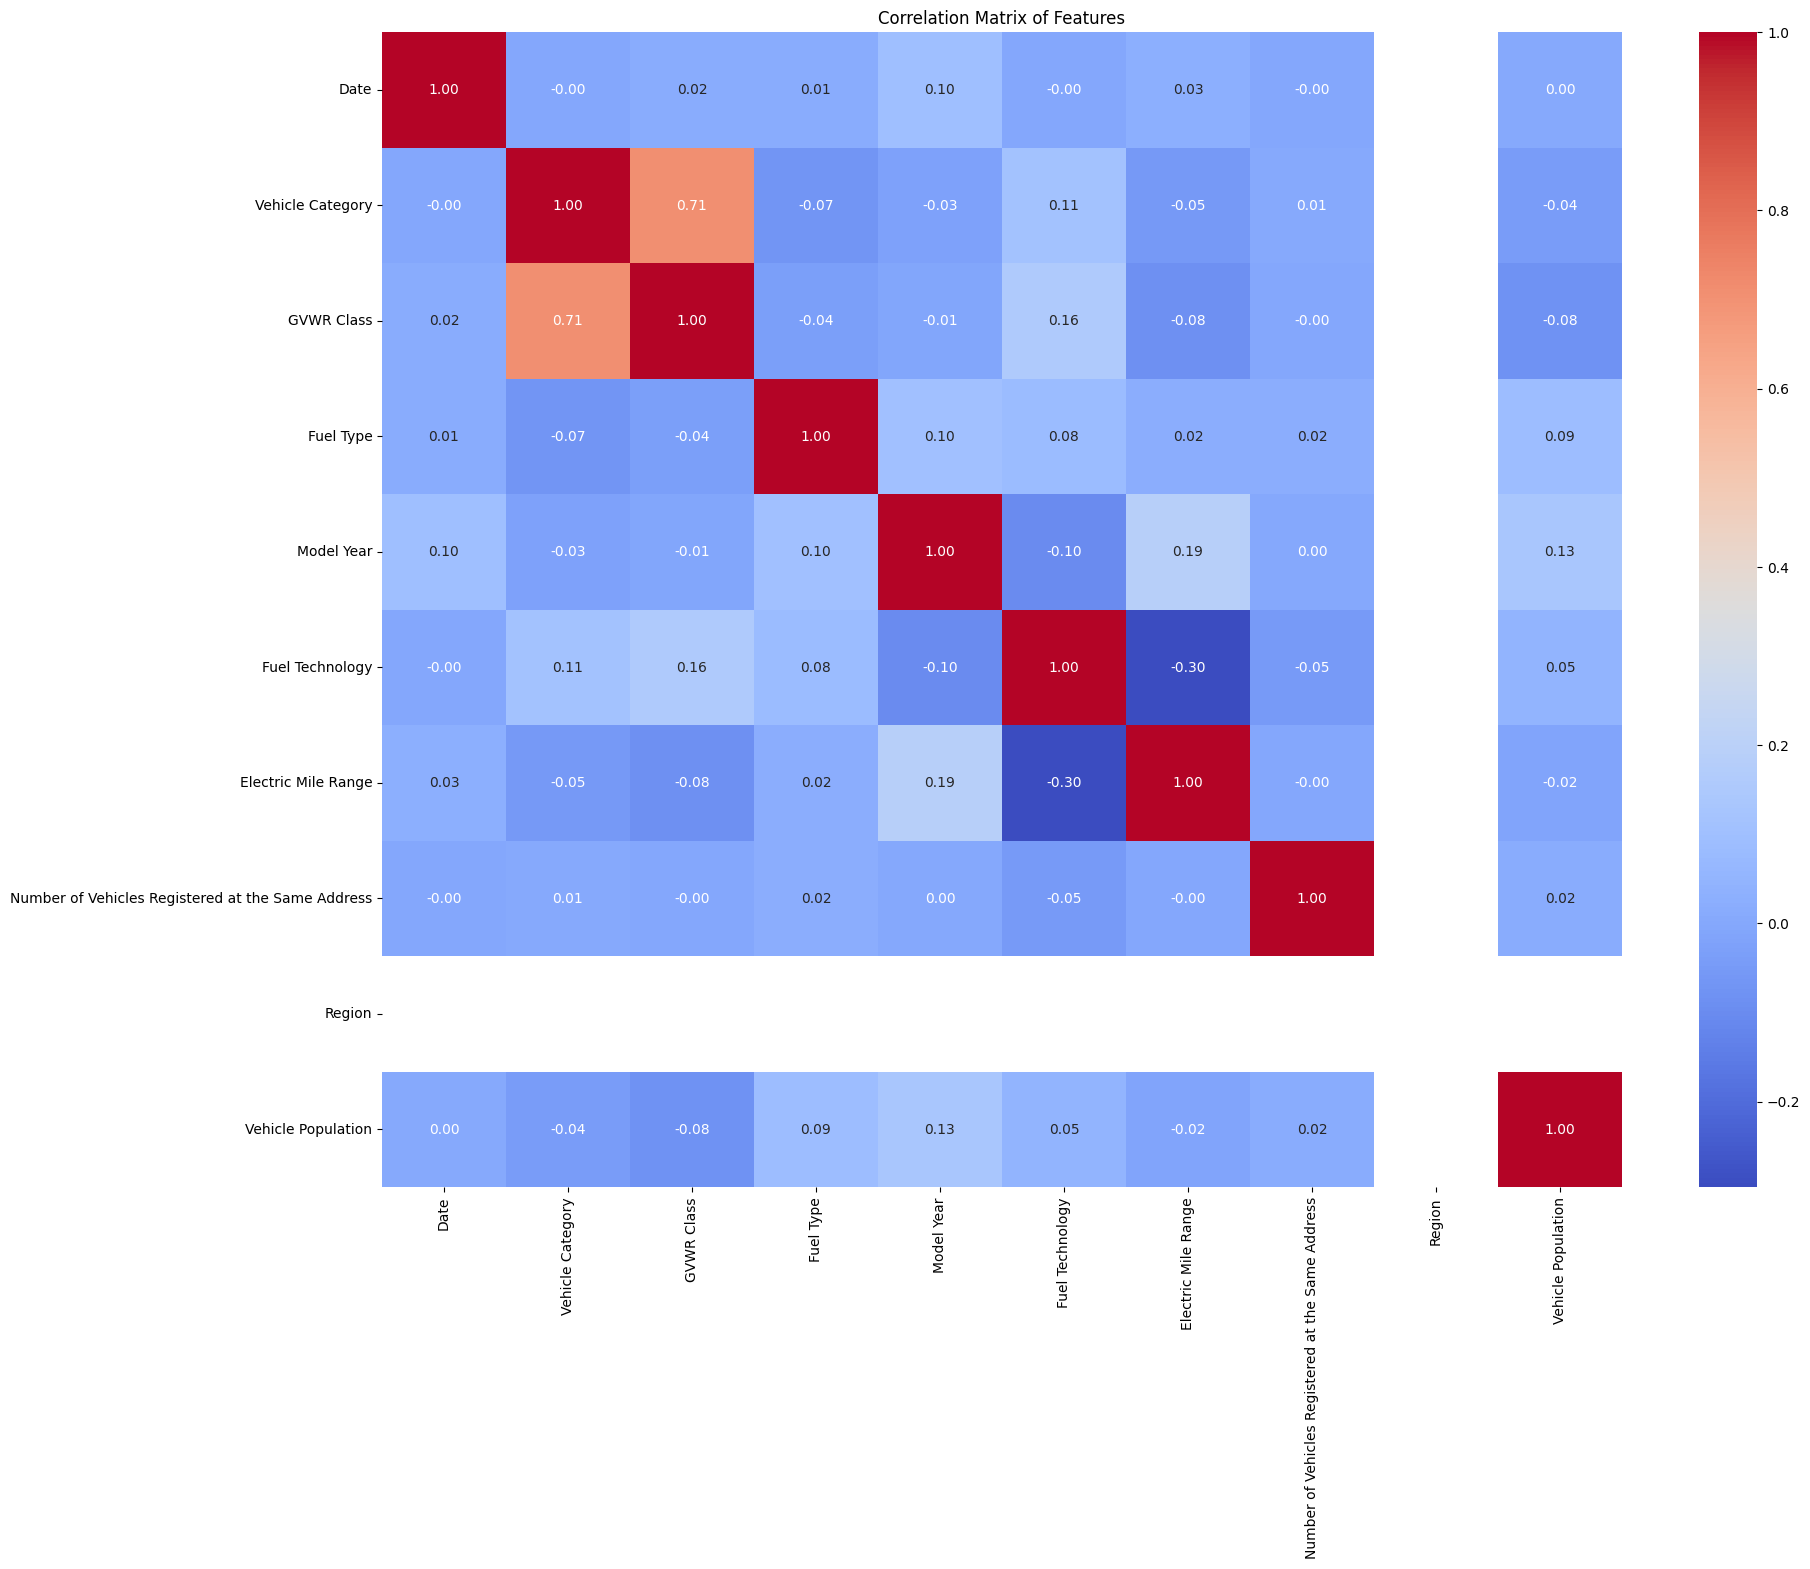

In [ ]:
# correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# feature Selection
features = ['Model Year', 'Vehicle Category', 'Fuel Type', 'Fuel Technology', 'Electric Mile Range', 'GVWR Class', 'Number of Vehicles Registered at the Same Address']
X = training_df[features]
y = training_df['Vehicle Population']

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
scoring_scaled = scaler.transform(scoring_df[features])

In [ ]:
# model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_scoring_pred = model.predict(scoring_scaled)

In [ ]:
# evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 6174.8820349413545


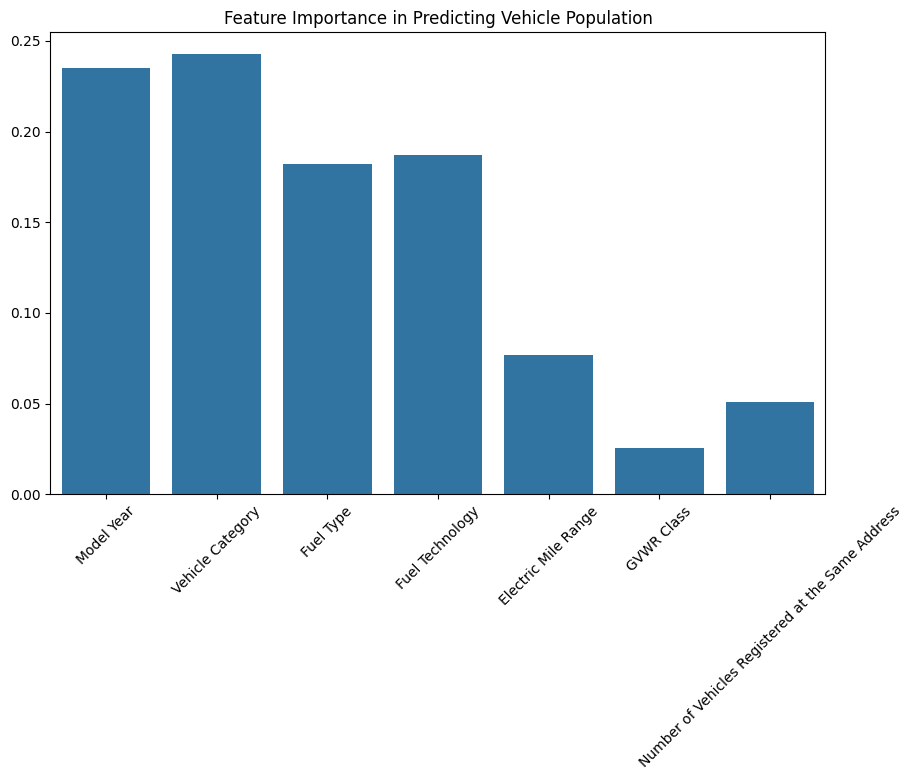

In [ ]:
# 1st chart - 2025 vehicle population by feature importance
plt.figure(figsize=(10, 6))
feature_importance = model.feature_importances_
sns.barplot(x=features, y=feature_importance)
plt.xticks(rotation=45)
plt.title("Feature Importance in Predicting Vehicle Population")
plt.show()

In [ ]:
# save predictions
scoring_df['Predicted Vehicle Population'] = y_scoring_pred
scoring_df.to_csv("vehicle_population_predictions.csv", index=False)

print("Predictions saved to vehicle_population_predictions.csv")

Predictions saved to vehicle_population_predictions.csv


In [ ]:
# predictions for 2025
y_pred_2025 = model.predict(scoring_scaled)

In [ ]:
# Group data and calculate total vehicle population
population_by_category = scoring_df.groupby(['Model Year', 'Vehicle Category', 'Fuel Type'])['Predicted Vehicle Population'].sum().reset_index()

In [ ]:
# Filter for 2025
population_2025 = population_by_category[population_by_category['Model Year'] == 2025]

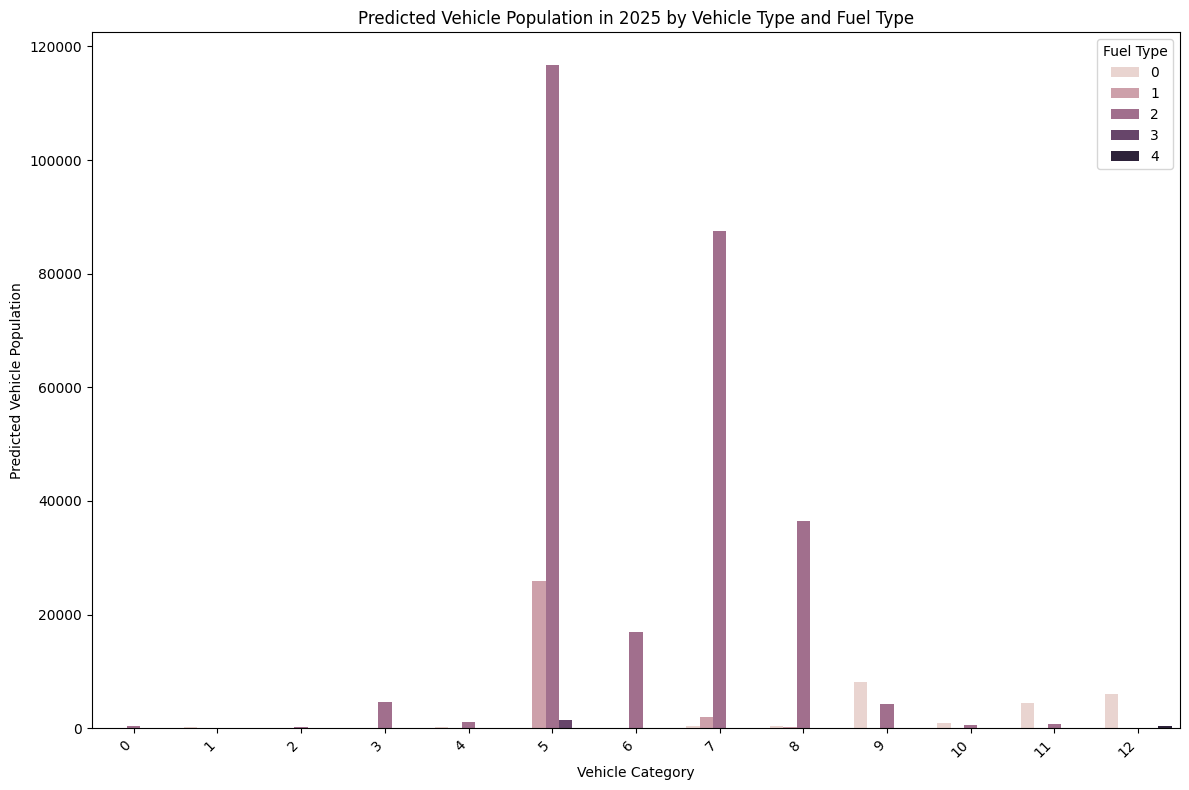

In [ ]:
# 2nd chart - Predicting vehicle population for 2025
plt.figure(figsize=(12, 8))
sns.barplot(x='Vehicle Category', y='Predicted Vehicle Population', hue='Fuel Type', data=population_2025)
plt.title('Predicted Vehicle Population in 2025 by Vehicle Type and Fuel Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
population_by_category = training_df.groupby(['Vehicle Category', 'Fuel Type'])['Vehicle Population'].sum().reset_index()

# Decode categorical features for better visualization
for col in ['Vehicle Category', 'Fuel Type']:
    population_by_category[col] = label_encoders[col].inverse_transform(population_by_category[col])


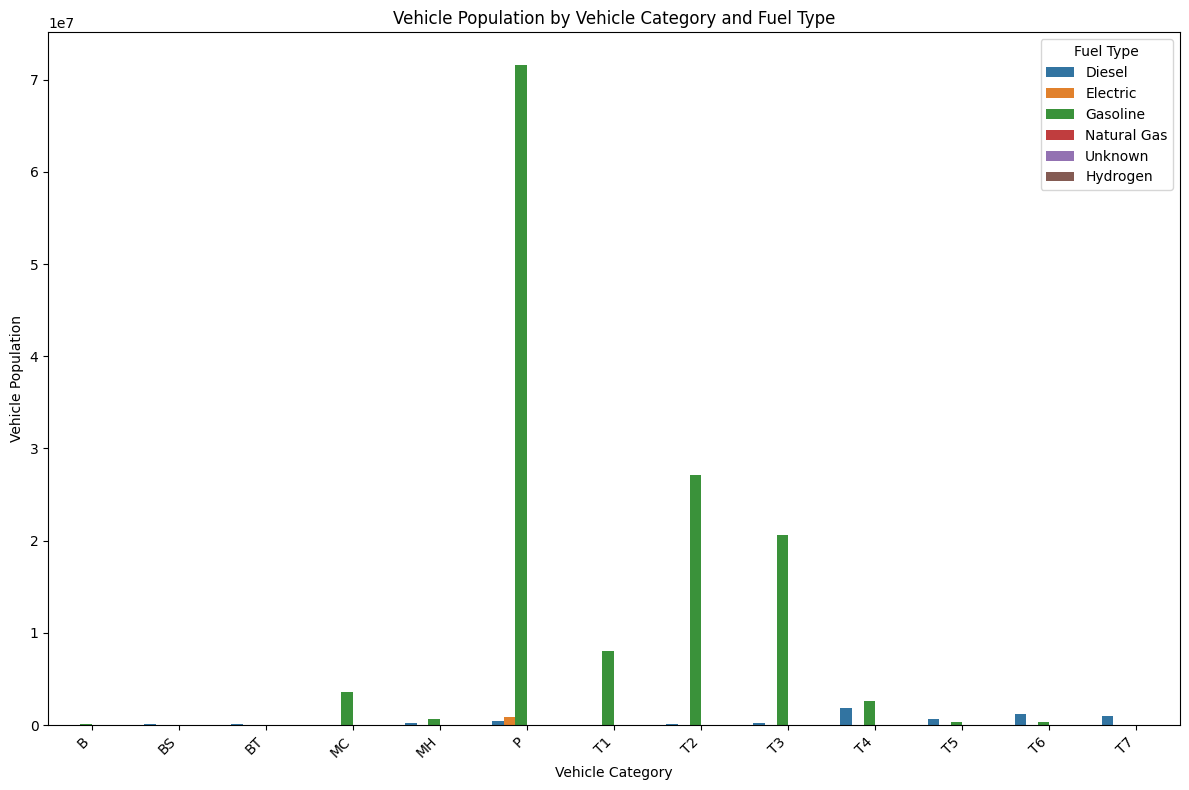

In [ ]:
# 3rd chart - detailed prediction
plt.figure(figsize=(12, 8))
sns.barplot(x='Vehicle Category', y='Vehicle Population', hue='Fuel Type', data=population_by_category)
plt.title('Vehicle Population by Vehicle Category and Fuel Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()